In [93]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

import project_module

In [15]:
reload(project_module)

<module 'project_module' from 'project_module.py'>

** Создание датасета **

Будем исползовать датасет GTZAN dataset.  
http://marsyasweb.appspot.com/download/data_sets/

В нем содержится 30-ти секундные фрагменты 1000 аудиозаписей следующих жанров: (blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock), по 100 аудио на каждый жанр.

Для сравнения аудиозаписей будем использовать мел-кепстральные коэффициенты. Эти коэффициенты - своеобразное представление энергии спектра сигнала..................

In [6]:
data = pd.read_csv('dataset.csv', sep=',', index_col=0)

In [7]:
data.head()

,genre,file_name,samplerate,duration,mean,std,max,min,diff_mean,diff_std
0,blues,blues.00000.au,22050,30,[ -1.50538264 -1.66745918 -15.21220703 4.23...,[ 1.14202743 6.01268043 8.70403617 9.26...,[ 1.01400399 13.70942565 11.68709764 29.98...,[ -4.85854815 -26.57615926 -42.66757796 -28.61...,[ -1.62076547e-01 -1.35447478e+01 1.9444190...,[ 6.11997806 12.51046351 11.42995379 11.04...
1,blues,blues.00001.au,22050,30,[ -3.27341626e+00 8.52053789e-01 -2.8907873...,[ 2.1263558 8.1618835 12.70405381 12.34...,[ 1.23421579 24.11494854 25.19993601 36.74...,[ -9.67297876 -32.81133142 -51.11621653 -34.84...,[ 4.12547005 -3.74284114 7.23281575 -11.75...,[ 9.13983632 16.90063541 17.14793627 13.05...
2,blues,blues.00002.au,22050,30,[ -9.43213843e-01 3.49022076e+00 -1.8450147...,[ 1.30325969 7.3102339 9.75454936 9.58...,[ 1.94451093 30.92381031 17.56145658 42.21...,[ -7.1497022 -42.67495042 -47.42781209 -27.95...,[ 4.43343461e+00 -2.19403685e+01 1.8106328...,[ 7.93639193 12.67006977 11.11101465 14.64...
3,blues,blues.00003.au,22050,30,[ -3.39170231 9.25209884 -4.38120259 4.95...,[ 1.56811584 7.69374057 8.64939629 8.37...,[ 0.50526175 35.59888198 17.72606136 30.46...,[ -7.70663011 -21.78396563 -39.60813859 -23.36...,[ 12.64380114 -13.63330142 9.33408447 -13.09...,[ 8.32276957 12.48046539 10.38500642 11.23...
4,blues,blues.00004.au,22050,30,[ -1.96142936 0.93701381 -23.26517463 -1.32...,[ 1.88318814 9.51916117 8.22781382 9.36...,[ 2.68423869 22.249557 1.29087329 38.57...,[ -7.535371 -41.6089841 -48.90922228 -25.54...,[ 2.89844317 -24.20218844 21.94310662 -28.03...,[ 10.80234986 11.22449014 13.26978398 14.48...


In [10]:
# И еще нужно загрузить метки
labels_df = pd.read_csv("models/labels.csv", index_col=0)
labels = labels_df.iloc[:, 0].to_dict()
labels_list = labels_df.index.values

In [16]:
data.iloc[:, 4:10] = data.iloc[:, 4:10].applymap(project_module.StringToList)

В качестве признакового пространства возьмем все основные статистики, т.е. (mean, std, max, min, diff_mean, diff_std). Всего 154 признака. Нормализуем данные и закодируем целевую переменную(жанры) с помощью label encoding.

In [17]:
X, y = project_module.PrepareDataForModel(data, labels)

** Метрика **

В качестве метрики будем использовать accuracy_score.
\begin{align}
&y = (y_1, y_2, \dots, y_N) \\
&\hat y = (\hat y_1, \hat y_2, \dots, \hat y_N) \\
&comp(y_i, \hat y_i) = \begin{cases} 1, \text{eсли } y_i = \hat y_i \\0, \text{если } y_i \neq \hat y_i \end{cases} \\
&accuracy\_score = \frac{\sum_{i=1}^N comp(y_i, \hat y_i)}{N} 
\end{align} 
С помощью этой метрики можем узнать, какой процент жанров мы верно получим используя модель.

** Визуализация данных **

Для визуализации будем использовать LinearDiscriminantAnalysis. Изобразим даные на плоскости.

In [21]:
model_visualise = LinearDiscriminantAnalysis(n_components=2)

In [28]:
model_visualise.fit(X, y)

In [30]:
visual = model_visualise.fit_transform(X, y)

In [40]:
visual[y==0].shape

(100, 2)

In [47]:
import matplotlib.cm as cm

In [159]:
colors = itertools.chain(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

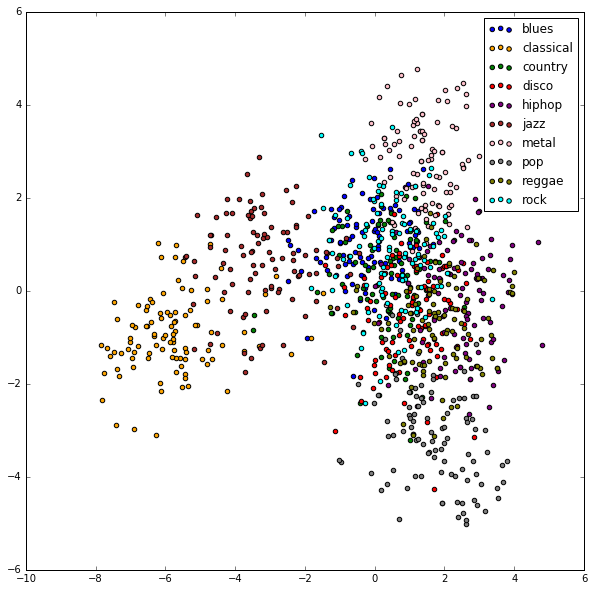

In [160]:
plt.figure(figsize=(10, 10))
for genre in xrange(10):
    plt.scatter(visual[y==genre][:,0], visual[y==genre][:,1], c=next(colors), label = labels_list[genre])
plt.legend()
plt.show()